In [26]:
# ============================== || BEGIN : DIR || ============================== ##
from codex.F_search import *
from codex.classDarkSUSY import *
# from codex.histograms import *
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm


import numpy as np
import pylab as pl # SE TARDA
from matplotlib import cm
import matplotlib.pyplot as plt
#from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

Delphes_DIR = "/home/franky8939/PROGRAMAS/MG5_aMC_v2_6_7/Delphes/"
ROOT_DIR = "/home/franky8939/PROGRAMAS/root-6.18.02/"
ROOT = fbash(Delphes_DIR, ROOT_DIR)  # path in bash

V_event = r"(?<=(_Event_))([\d\.]+)"
V_mass = r"(?<=(_Ma_))([\d|\.]+)"
V_tc = r"(?<=(_Tc_))([\d|\.]+)"
# CLASE DARKSUSY
DarkFile = DarkSUSY()  # inicializar la clase

In [3]:
# # GRAFICO GENERAL DE LOS DATOS
MPho = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # masa de los photons
TcPho = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90 ,100]  # valores de Tc
X0, Y0 = np.meshgrid(MPho, TcPho, sparse=False, indexing='ij')  # MATRIX COMBINADA
Z0 = np.zeros(X0.shape)
#print X0
#print Y0
# Grafico 3d
# BUSCANDO ARCHIVO
for i in range(Z0.shape[0]):
    for j in range(Z0.shape[1]):
        # localizar el archivo respectivo
        finalfileROOT = None
        for fileROOT in os.listdir("data/"):
            #print X[i, j], Y[i, j], fileROOT
            if (fileROOT.find(".root") != -1) and (fileROOT.find("Mu4_darkSUSY_") != -1):  # verificar que seas
                Mass0 = X0[i, j]
                Mass1 = re.search(V_mass, fileROOT).group(0)
                Tc0 = Y0[i, j]
                Tc1 = re.search(V_tc, fileROOT).group(0)
                Event0 = 10000
                Event1 = re.search(V_event, fileROOT).group(0)
                if float(Event0) == float(Event1) and float(Mass0) == float(Mass1) and float(Tc0) == float(Tc1):
                    finalfileROOT = fileROOT
                    #print("El archivo fue encontrado: " + fileROOT)
                    DarkFile.Add_File("data/" + fileROOT)
                    #DarkFile.Select_two_dimuon()
                    Z0[i, j] = DarkFile.Entries
                    break
                #else:
                #    print("Archivo root correspondiente no encontrado")
        if finalfileROOT == None:
            print X0[i, j], Y0[i, j], " File correspondiente no fue encontrado"
            quit()
        #print i, j
        #print j

The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_1.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_10.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_20.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_30.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_40.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_50.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_60.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_70.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_80.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_90.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_100.root.root has been successfully loaded.
The file d

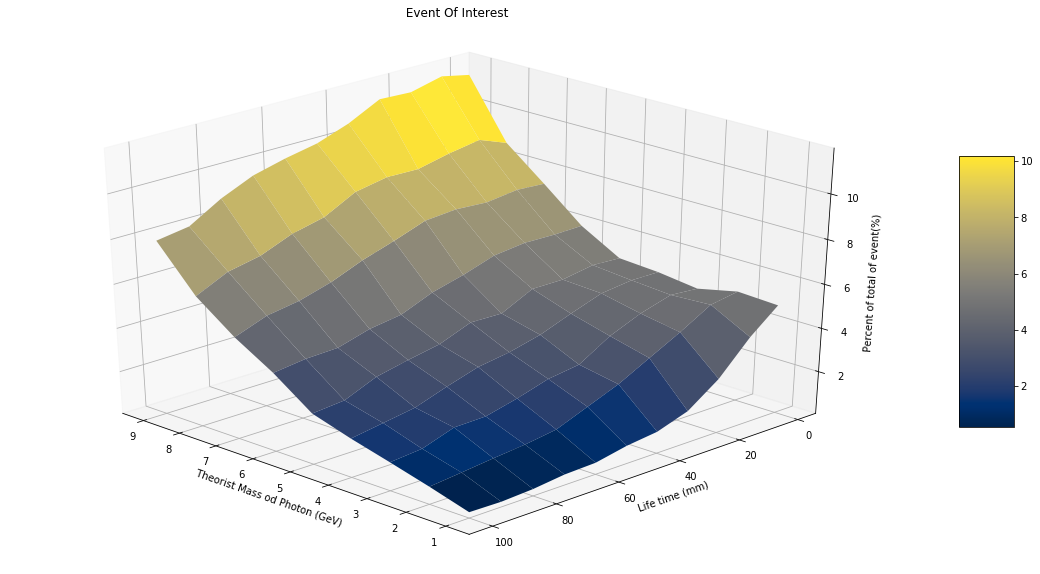

In [24]:
TcPho_m,MPho_m = np.meshgrid(TcPho, MPho)

plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot = ax.plot_surface(MPho_m, 
                TcPho_m, 
                Z0/100, cmap = 'cividis')

ax.set_title(' Event Of Interest ', y=1.08)
ax.set_xlabel('  Theorist Mass od Photon (GeV)')
ax.set_ylabel(" Life time (mm)")
ax.set_zlabel(" Percent of total of event(%)")


ax.view_init(30, 135)
fig.colorbar(plot, shrink=0.5, aspect=5)

plt.savefig("Seleccion of Event with Default configuracion of detector.pdf")

In [28]:
# # GRAFICO GENERAL DE LOS DATOS 2 
MPho = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # masa de los photons
TcPho = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # valores de Tc
X0, Y0 = np.meshgrid(MPho, TcPho, sparse=False, indexing='ij')  # MATRIX COMBINADA
Z00 = np.zeros(X0.shape)

In [29]:
#print X0
#print Y0
# Grafico 3d
# BUSCANDO ARCHIVO
for i in range(Z00.shape[0]):
    for j in range(Z00.shape[1]):
        # localizar el archivo respectivo
        finalfileROOT = None
        for fileROOT in os.listdir("data/"):
            #print X[i, j], Y[i, j], fileROOT
            if (fileROOT.find(".root") != -1) and (fileROOT.find("Mu4_darkSUSY_") != -1):  # verificar que seas
                Mass0 = X0[i, j]
                Mass1 = re.search(V_mass, fileROOT).group(0)
                Tc0 = Y0[i, j]
                Tc1 = re.search(V_tc, fileROOT).group(0)
                Event0 = 10000
                Event1 = re.search(V_event, fileROOT).group(0)
                if float(Event0) == float(Event1) and float(Mass0) == float(Mass1) and float(Tc0) == float(Tc1):
                    finalfileROOT = fileROOT
                    #print("El archivo fue encontrado: " + fileROOT)
                    DarkFile.Add_File("data/" + fileROOT)
                    #DarkFile.Select_two_dimuon()
                    Z00[i, j] = DarkFile.Entries
                    break
                #else:
                #    print("Archivo root correspondiente no encontrado")
        if finalfileROOT == None:
            print X0[i, j], Y0[i, j], " File correspondiente no fue encontrado"
            quit()
        #print i, j
        #print j

The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_1.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_2.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_3.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_4.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_5.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_6.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_7.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_8.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_9.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_1_Tc_10.root.root has been successfully loaded.
The file data/Mu4_darkSUSY_Event_10000_Ma_2_Tc_1.root.root has been successfully loaded.
The file data/Mu4_da

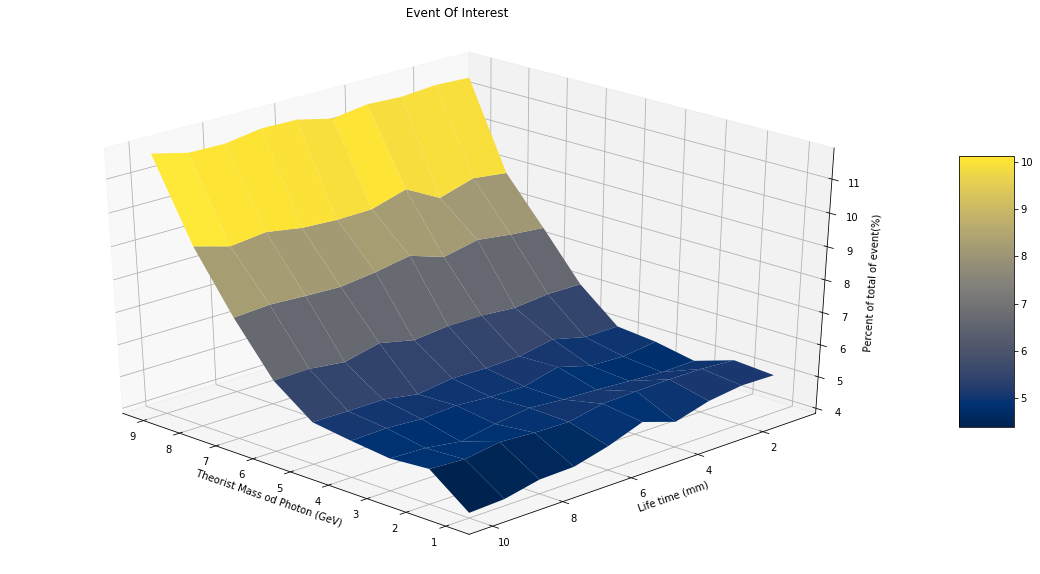

In [30]:
TcPho_m,MPho_m = np.meshgrid(TcPho, MPho)

plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot = ax.plot_surface(MPho_m, 
                TcPho_m, 
                Z00/100, cmap = 'cividis')

ax.set_title(' Event Of Interest ', y=1.08)
ax.set_xlabel('  Theorist Mass od Photon (GeV)')
ax.set_ylabel(" Life time (mm)")
ax.set_zlabel(" Percent of total of event(%)")


ax.view_init(30, 135)
fig.colorbar(plot, shrink=0.5, aspect=5)

plt.savefig("Seleccion 2 of Event with Default configuracion of detector.pdf")

In [ ]:
## PARA HL




